## 因子绩效

1. 读取本地数据
2. 获取因子位移
3. 获取事件驱动
4. 算法介绍链接

## 1_读取本地数据

In [1]:
from jaqs.data import DataView
from jaqs.data import RemoteDataService
import os
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
dv = DataView()
dataview_folder = './JAQS_Data/hs300'
dv.load_dataview(dataview_folder)

Dataview loaded successfully.


## 2_因子绩效
例子以roe_pb为因子

In [3]:
factor = dv.get_ts('roe_pb')

In [4]:
print(factor.tail())

symbol      000001.SZ  000002.SZ  000008.SZ  000009.SZ  000027.SZ  000039.SZ  \
trade_date                                                                     
20171225     7.938681   3.350342   0.513118   1.193905   3.392801   2.059976   
20171226     7.700575   3.336098   0.499620   1.190599   3.387159   2.031077   
20171227     7.914554   3.304687   0.501346   1.188918   3.404141   2.081057   
20171228     7.962956   3.314333   0.504822   1.192250   3.409522   2.048683   
20171229     7.909059   3.275973   0.499620   1.184008   3.392801   1.964461   

symbol      000046.SZ  000060.SZ  000061.SZ  000063.SZ    ...      601992.SH  \
trade_date                                                ...                  
20171225     3.123548   3.889348   0.021180   2.648181    ...       4.628872   
20171226     3.140398   3.848810   0.021038   2.648931    ...       4.646021   
20171227     3.140398   3.837791   0.020899   2.723560    ...       4.637431   
20171228     3.144528   3.668179   0.02

In [5]:
mask = dv.get_ts('mask_index_member')
can_enter = dv.get_ts('can_enter')
can_exit = dv.get_ts('can_exit')
price = dv.get_ts('close_adj')
group = dv.get_ts('group')

In [6]:
import matplotlib.pyplot as plt
from jaqs.research import SignalDigger
import warnings

def cal_obj(signal, name, period, quantile):
    obj = SignalDigger()
    obj.process_signal_before_analysis(signal,
                                   price=price,
                                   n_quantiles=quantile, period=period,
                                   can_enter = can_enter,
                                   can_exit = can_exit,
                                   group=group,
                                   mask=mask
                                   )
    obj.create_full_report()
    return obj

def plot_pfm(signal, name, period=5, quantile=5):
    obj = cal_obj(signal, name, period, quantile)
    plt.show()

def signal_data(signal, name, period=5, quantile=5):
    obj = cal_obj(signal, name, period, quantile)
    return obj.signal_data

Nan Data Count (should be zero) : 0;  Percentage of effective data: 76%


Value of signals of Different Quantiles Statistics
                min        max      mean       std  count    count %
quantile                                                            
1        -18.463821   1.778990  0.139305  1.704527  13956  20.144923
2          0.282443   2.948233  1.374009  0.677225  13857  20.002021
3          0.714527   4.333657  2.103057  0.970717  13858  20.003464
4          1.014203   6.679995  3.070526  1.426623  13857  20.002021
5          1.575129  17.578356  6.232725  3.350173  13750  19.847571
Figure saved: C:\Users\small\Desktop\PythonQTC\course\3_JAQS\returns_report.pdf
Information Analysis
                ic
IC Mean      0.076
IC Std.      0.210
t-stat(IC)   5.564
p-value(IC)  0.000
IC Skew      0.018
IC Kurtosis -0.742
Ann. IR      0.361
Figure saved: C:\Users\small\Desktop\PythonQTC\course\3_JAQS\information_report.pdf


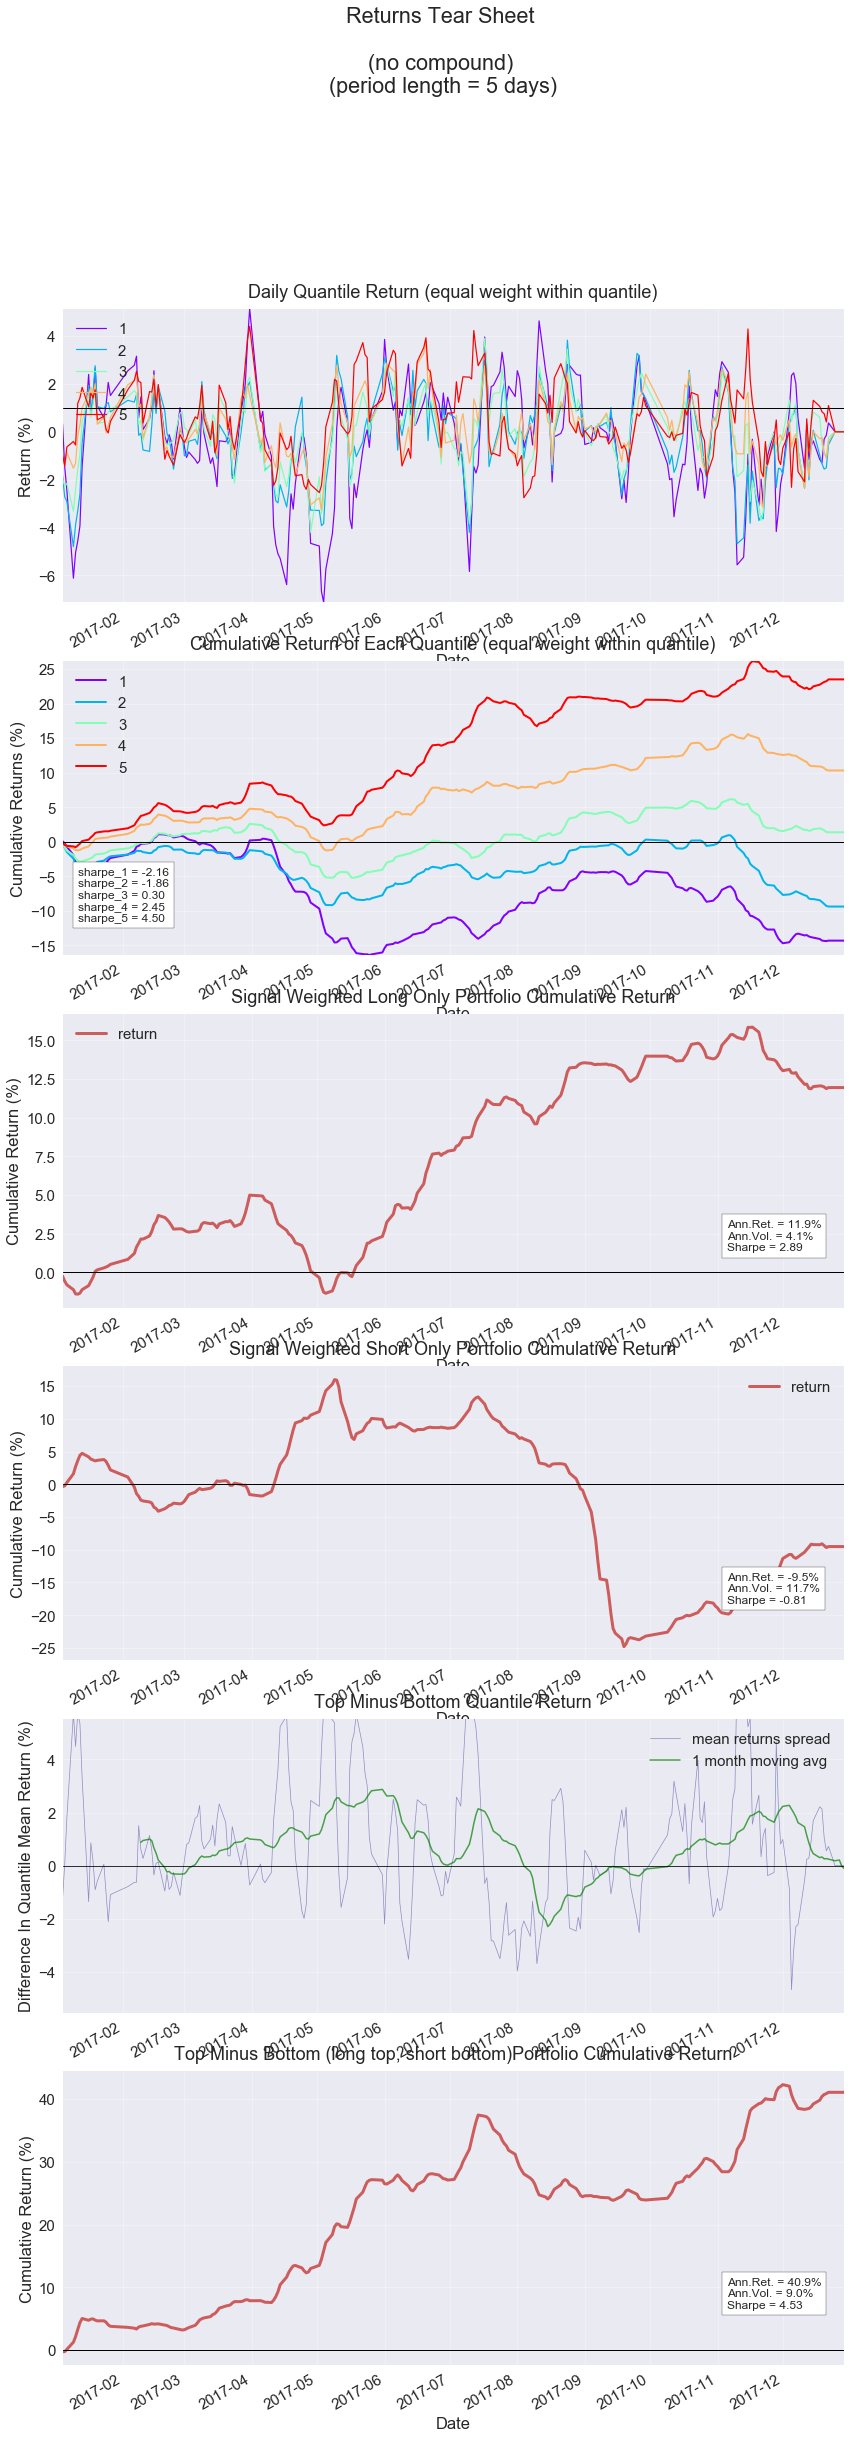

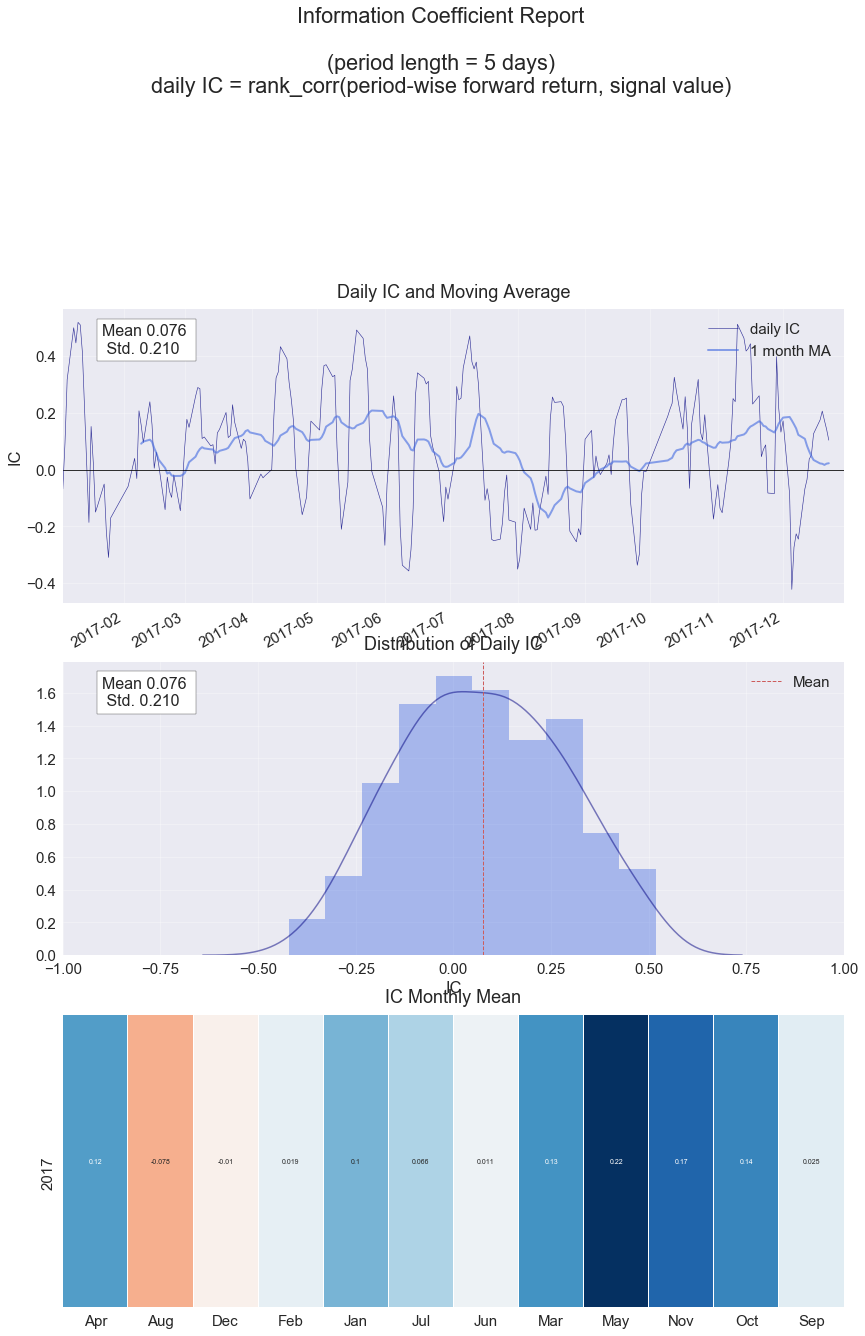

In [7]:
plot_pfm(factor, 'roe_pb', period=5, quantile=5)

In [8]:
signal_df = signal_data(factor, 'roe_pb')

Nan Data Count (should be zero) : 0;  Percentage of effective data: 76%


Value of signals of Different Quantiles Statistics
                min        max      mean       std  count    count %
quantile                                                            
1        -18.463821   1.778990  0.139305  1.704527  13956  20.144923
2          0.282443   2.948233  1.374009  0.677225  13857  20.002021
3          0.714527   4.333657  2.103057  0.970717  13858  20.003464
4          1.014203   6.679995  3.070526  1.426623  13857  20.002021
5          1.575129  17.578356  6.232725  3.350173  13750  19.847571
Figure saved: C:\Users\small\Desktop\PythonQTC\course\3_JAQS\returns_report.pdf
Information Analysis
                ic
IC Mean      0.076
IC Std.      0.210
t-stat(IC)   5.564
p-value(IC)  0.000
IC Skew      0.018
IC Kurtosis -0.742
Ann. IR      0.361
Figure saved: C:\Users\small\Desktop\PythonQTC\course\3_JAQS\information_report.pdf


In [9]:
print(signal_df)

                         signal    return group  quantile
trade_date symbol                                        
20170104   000001.SZ  11.796985 -0.002983    银行         5
           000002.SZ   3.614514 -0.022383   房地产         4
           000008.SZ   1.147170 -0.003995  机械设备         2
           000009.SZ   0.946554 -0.031786    综合         1
           000027.SZ   4.843338  0.009257  公用事业         4
           000039.SZ  -0.425120  0.042182  机械设备         1
           000060.SZ   0.667285  0.008832  有色金属         1
           000061.SZ   1.016943 -0.000007  商业贸易         1
           000063.SZ   3.347433 -0.076342    通信         3
           000069.SZ   5.205344 -0.003661   房地产         4
           000100.SZ   3.758468 -0.012496  家用电器         4
           000156.SZ   1.811272 -0.012345    传媒         2
           000157.SZ  -2.229455  0.003567  机械设备         1
           000333.SZ   7.430020 -0.042034  家用电器         5
           000338.SZ   3.739270  0.019588    汽车         4
           000

In [15]:
Q5 = signal_df.signal[signal_df['quantile']==5]

In [18]:
Q5[Q5>0]=1

In [21]:
dv.append_df(Q5.unstack(),'roe_pb_Q5')

In [25]:
dv.get_ts('roe_pb_Q5').tail()

symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,000061.SZ,000063.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603799.SH,603833.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20171225,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171226,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171227,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171228,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171229,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
dv.save_dataview('./JAQS_Data/hs300')


Store data...
Dataview has been successfully saved to:
C:\Users\small\Desktop\PythonQTC\course\3_JAQS\JAQS_Data\hs300

You can load it with load_dataview('C:\Users\small\Desktop\PythonQTC\course\3_JAQS\JAQS_Data\hs300')
